# K-Means Clustering

## Importing the libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [12]:
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:, [4, 5]].values #there isn't a dependendant variable rather the last column is a feature
#there are some features that arent that useful so it is essential to remove useless columns for the analysis 
print(X)

[[      0       0]
 [      0       0]
 [      0       0]
 [   6805       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [   8553       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [  13061     938]
 [   4896       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [   5843       0]
 [      0       0]
 [   3921       0]
 [   5777       0]
 [   4392       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [      0       0]
 [  16040     611]
 [   6215       0]
 [      0       0]
 [      0       0]
 [   5852       0]
 [  10407       0]
 [      0       0]
 [      0       0]
 [   8690   

## Using the elbow method to find the optimal number of clusters

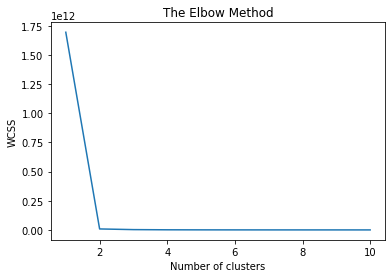

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11): #this is the number of clusters 

    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #this will square it and then give the wcss value 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#In this case the nu,mber of clusters that looks good is 5, it appears to converge around there. 

## Training the K-Means model on the dataset

In [14]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

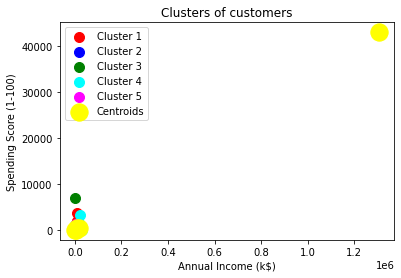

In [15]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
#first index is the cluster and then the second index is the column that it is associated with. 

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
#cluster centres is a 2d array which is associated is associated with different centroids and then it is associated with their coordinates.
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()